In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(row[0])
            prices.append([float(row[1]), float(row[2]), float(row[3]), float(row[4])])
    return

In [9]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    
    C = 1e3
    svr_lin = SVR(kernel='linear', C=C, cache_size=1000)
    svr_pol = SVR(kernel='poly', C=C, cache_size=1000, degree=2)
    svr_rbf = SVR(C=C, cache_size=1000)
    
    svr_lin.fit(dates, prices)
    svr_pol.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_lin.predict(dates), color='R', label='Linear')
    plt.plot(dates, svr_pol.predict(dates), color='G', label='Polynomial')
    plt.plot(dates, svr_rbf.predict(dates), color='B', label='RBF')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    #plt.show()
    #input()
    #return svr_lin.predict(x)[0], svr_rbf.predict(x)[0]
    return svr_lin.predict(x)[0], svr_pol.predict(x)[0], svr_rbf.predict(x)[0]
    

In [4]:
dates, prices = [], []
get_data('aapl.csv')

In [5]:
from datetime import date
last_date = datetime.strptime(dates[-1], '%d-%b-%y').date()
dates = [(datetime.strptime(d,'%d-%b-%y').date() - last_date).days for d in dates]

In [6]:
morning_prices = [p[0] for p in prices]

In [7]:
# Reverse for comfort
window_size = 10
dates = dates[::-1]
morning_prices = morning_prices[::-1]

In [10]:
# List of all predictions (to compare with the real values)
predictions = []
for i in range(window_size, len(dates)-1):
    predictions.append(
        # predict_prices returns y_pred
        predict_prices(
            dates[i : i + window_size], # X_train
            morning_prices[i : i + window_size], # y_train
            dates[i + 1] # X_test
        )
    )
predictions

[(95.216999999985674, 95.241394731013187, 95.099852909959452),
 (95.086153846209726, 95.09001787973132, 95.759985973468986),
 (95.706666666581384, 93.56159998237527, 96.420182242303099),
 (93.998999999947799, 94.039403829542394, 93.229558359453236),
 (93.600000000096486, 93.725454532001066, 94.389745354435505),
 (94.360769230744097, 94.323510388215212, 95.820075366236679),
 (94.134285714381306, 94.322040801673751, 93.890017373198219),
 (94.29000000002965, 94.289999864369975, 94.289723024755858),
 (95.120000000007977, 95.119999951108838, 95.120080271454299),
 (95.968000000093866, 95.990000047832979, 96.77023563584909),
 (96.095714285406785, 96.141809907607183, 98.740023938460467),
 (95.900000000328049, 95.985714279311807, 96.100058875837419),
 (96.321428571573065, 96.209999874840619, 96.409571471467316),
 (95.310000000232449, 95.506463492105311, 96.300138405858007),
 (95.531428571000021, 95.592522304123122, 94.079788327175393),
 (95.949999999900427, 95.949999621160174, 96.14971200711494

In [11]:
from sklearn.metrics import mean_squared_error
lin_preds = [p[0] for p in predictions]
pol_preds = [p[1] for p in predictions]
rbf_preds = [p[2] for p in predictions]

In [32]:
true_ys = morning_prices[10:-1]
print(mean_squared_error(true_ys, lin_preds))
print(mean_squared_error(true_ys, pol_preds))
print(mean_squared_error(true_ys, rbf_preds))

2.35525899261
48584037072.5
2.05319476603


In [33]:
# Discard pol preds bc diverges. And is more expensive to calc (without max_iter)
import pandas as pd
np_real_values = np.asarray(real_values)
df_predictions = pd.DataFrame(predictions, columns=('Lin', 'Pol', 'RBF')).drop('Pol', axis=1)

In [34]:
lin_beats_rbf = np.count_nonzero(abs(df_predictions['Lin']-np_real_values) > np.abs(df_predictions['RBF']-np_real_values))
rbf_beats_lin = len(df_predictions) - lin_beats_rbf

if lin_beats_rbf > rbf_beats_lin:
    print('Linear kernel preferred', lin_beats_rbf/len(df_predictions))
else:
    print('Radial basis function kernel preferred', rbf_beats_lin/len(df_predictions))

Radial basis function kernel preferred 0.5666666666666667


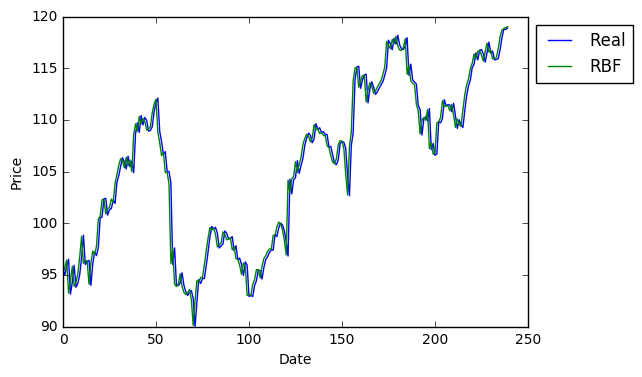

In [78]:
plt.plot(true_ys)
plt.plot(rbf_preds)
plt.legend(['Real', 'RBF'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

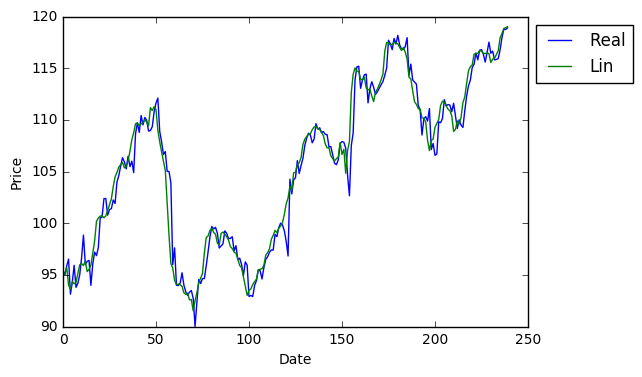

In [79]:
plt.plot(true_ys)
plt.plot(lin_preds)
plt.legend(['Real', 'Lin'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()